In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#Problem 1

url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GDPC1,PCECC96,GPDIC1&scale=left,left,left&cosd=1947-01-01,1947-01-01,1947-01-01&coed=2021-10-01,2021-10-01,2021-10-01&line_color=%234572a7,%23aa4643,%2389a54e&link_values=false,false,false&line_style=solid,solid,solid&mark_type=none,none,none&mw=3,3,3&lw=2,2,2&ost=-99999,-99999,-99999&oet=99999,99999,99999&mma=0,0,0&fml=a,a,a&fq=Quarterly,Quarterly,Quarterly&fam=avg,avg,avg&fgst=lin,lin,lin&fgsnd=2020-02-01,2020-02-01,2020-02-01&line_index=1,2,3&transformation=lin,lin,lin&vintage_date=2022-04-12,2022-04-12,2022-04-12&revision_date=2022-04-12,2022-04-12,2022-04-12&nd=1947-01-01,1947-01-01,1947-01-01"

data = pd.read_csv(url, parse_dates=True, index_col=0)

names = {"GDPC1":"GDP","PCECC96":"Consumption","GPDIC1":"Investment"}
data.rename(columns=names,inplace=True)

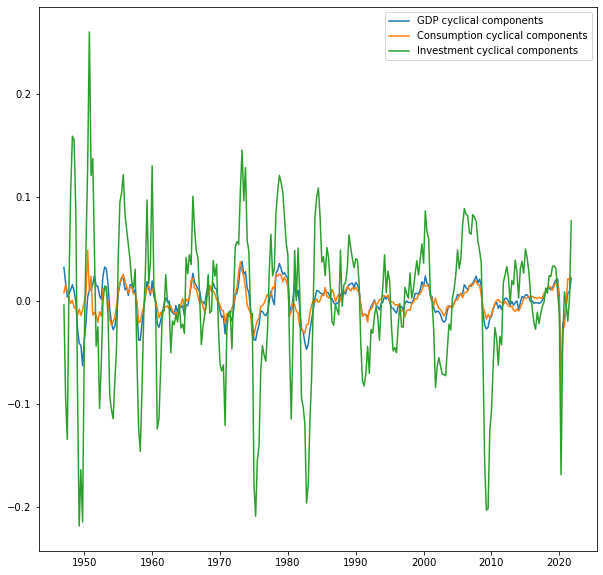

In [3]:
#HP Filter

hpcycle_gdp, hptrend_gdp = sm.tsa.filters.hpfilter(data['GDP'])
hpcycle_c, hptrend_c = sm.tsa.filters.hpfilter(data['Consumption'])
hpcycle_i, hptrend_i = sm.tsa.filters.hpfilter(data['Investment'])

fig, ax = plt.subplots(figsize=(10,10))

ax.plot(hpcycle_gdp/hptrend_gdp,label='GDP cyclical components')
ax.plot(hpcycle_c/hptrend_c,label='Consumption cyclical components')
ax.plot(hpcycle_i/hptrend_i,label='Investment cyclical components')

ax.legend()
plt.show()

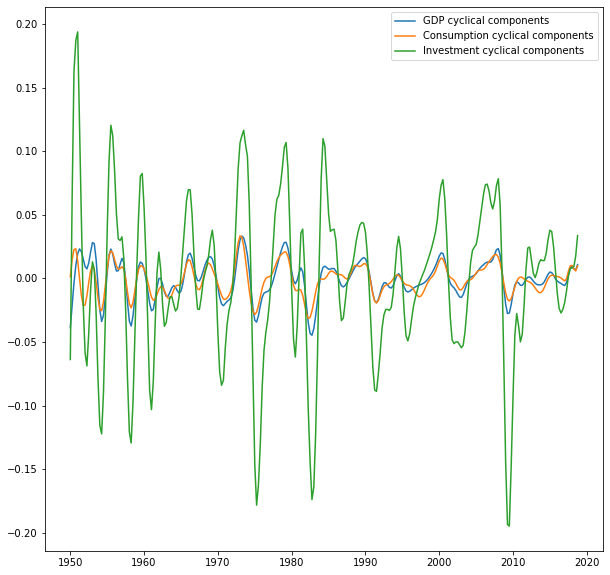

In [4]:
#Bandpass Filter

bkcycle_gdp = sm.tsa.filters.bkfilter(data['GDP'])
bktrend_gdp = data['GDP']-bkcycle_gdp

bkcycle_i = sm.tsa.filters.bkfilter(data['Investment'])
bktrend_i = data['Investment']-bkcycle_i

bkcycle_c = sm.tsa.filters.bkfilter(data['Consumption'])
bktrend_c = data['Consumption']-bkcycle_c

fig, ax = plt.subplots(figsize=(10,10))

ax.plot(bkcycle_gdp/bktrend_gdp,label='GDP cyclical components')
ax.plot(bkcycle_c/bktrend_c,label='Consumption cyclical components')
ax.plot(bkcycle_i/bktrend_i,label='Investment cyclical components')

ax.legend()
plt.show()

Text(0.5, 1.0, 'Correlation between GDP and $FFR_{t+i}$')

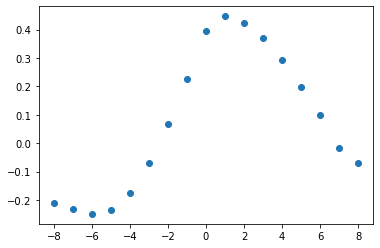

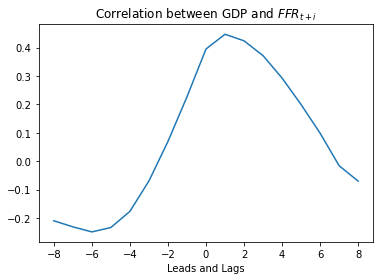

In [5]:
#Problem 2

ffr_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=774&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=FEDFUNDS&scale=left&cosd=1954-07-01&coed=2022-03-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-05-02&revision_date=2022-05-02&nd=1954-07-01"
ffr = pd.read_csv(ffr_url, parse_dates=True, index_col=0)
hpcycle_ffr, hptrend_ffr = sm.tsa.filters.hpfilter(ffr['FEDFUNDS'])

tffr = hptrend_ffr.loc[:'2021-10-01'] #ffr trend
tgdp = hptrend_gdp.loc['1954-07-01':'2021-10-01'] #gdp trend

cffr = hpcycle_ffr.loc[:'2021-10-01'] #ffr cycle 
cgdp = hpcycle_gdp.loc['1954-07-01':'2021-10-01'] #gdp cycle

lags, c, line, b = plt.xcorr(cffr/tffr,cgdp/tgdp,normed=True,usevlines=False,maxlags=8)

fig, ax = plt.subplots()

ax.plot(np.arange(-8,9),c)
ax.set_xlabel('Leads and Lags')
ax.set_title('Correlation between GDP and $FFR_{t+i}$')


In [6]:
#Problem 3

url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

confirmed = pd.read_csv(url_confirmed,parse_dates=True)
deaths = pd.read_csv(url_deaths,parse_dates=True)
recovered = pd.read_csv(url_recovered,parse_dates=True)

In [7]:
#Confirmed data

dropccols = confirmed.columns
confirmed.drop(columns=dropccols[[2,3]], inplace=True)

confirmed.set_index(['Country/Region','Province/State'],inplace=True)
temp_confirmed = confirmed.stack()
temp_confirmed.index.set_names(['country','province/state','date'],inplace=True)
temp_confirmed.name = 'cases'

confirmed = temp_confirmed.to_frame()
confirmed.index = confirmed.index.set_levels([confirmed.index.levels[0],confirmed.index.levels[1],pd.to_datetime(confirmed.index.levels[2])])

confirmed

cases
country     province/state date              
Afghanistan NaN            2020-01-22       0
                           2020-01-23       0
                           2020-01-24       0
                           2020-01-25       0
                           2020-01-26       0
...                                       ...
Zimbabwe    NaN            2022-04-27  247729
                           2022-04-28  247784
                           2022-04-29  247842
                           2022-04-30  247875
                           2022-05-01  247911

[236004 rows x 1 columns]

In [8]:
#Deaths data

dropdcols = deaths.columns
deaths.drop(columns=dropdcols[[2,3]], inplace=True)

deaths.set_index(['Country/Region','Province/State'],inplace=True)
temp_deaths = deaths.stack()
temp_deaths.index.set_names(['country','province/state','date'],inplace=True)
temp_deaths.name = 'deaths'

deaths = temp_deaths.to_frame()
deaths.index = deaths.index.set_levels([deaths.index.levels[0],deaths.index.levels[1],pd.to_datetime(deaths.index.levels[2])])

deaths

deaths
country     province/state date              
Afghanistan NaN            2020-01-22       0
                           2020-01-23       0
                           2020-01-24       0
                           2020-01-25       0
                           2020-01-26       0
...                                       ...
Zimbabwe    NaN            2022-04-27    5469
                           2022-04-28    5469
                           2022-04-29    5469
                           2022-04-30    5469
                           2022-05-01    5469

[236004 rows x 1 columns]

In [9]:
#Recovered data

droprcols = recovered.columns
recovered.drop(columns=droprcols[[2,3]], inplace=True)

recovered.set_index(['Country/Region','Province/State'],inplace=True)
temp_recovered = recovered.stack()
temp_recovered.index.set_names(['country','province/state','date'],inplace=True)
temp_recovered.name = 'recovered'

recovered = temp_recovered.to_frame()
recovered.index = recovered.index.set_levels([recovered.index.levels[0],recovered.index.levels[1],pd.to_datetime(recovered.index.levels[2])])

recovered

recovered
country     province/state date                 
Afghanistan NaN            2020-01-22          0
                           2020-01-23          0
                           2020-01-24          0
                           2020-01-25          0
                           2020-01-26          0
...                                          ...
Zimbabwe    NaN            2022-04-27          0
                           2022-04-28          0
                           2022-04-29          0
                           2022-04-30          0
                           2022-05-01          0

[223539 rows x 1 columns]

In [10]:
#Aggregate data

df = confirmed
df['deaths'] = deaths['deaths']
df['recovered'] = recovered['recovered']

df

cases  deaths  recovered
country     province/state date                                 
Afghanistan NaN            2020-01-22       0       0          0
                           2020-01-23       0       0          0
                           2020-01-24       0       0          0
                           2020-01-25       0       0          0
                           2020-01-26       0       0          0
...                                       ...     ...        ...
Zimbabwe    NaN            2022-04-27  247729    5469          0
                           2022-04-28  247784    5469          0
                           2022-04-29  247842    5469          0
                           2022-04-30  247875    5469          0
                           2022-05-01  247911    5469          0

[236004 rows x 3 columns]

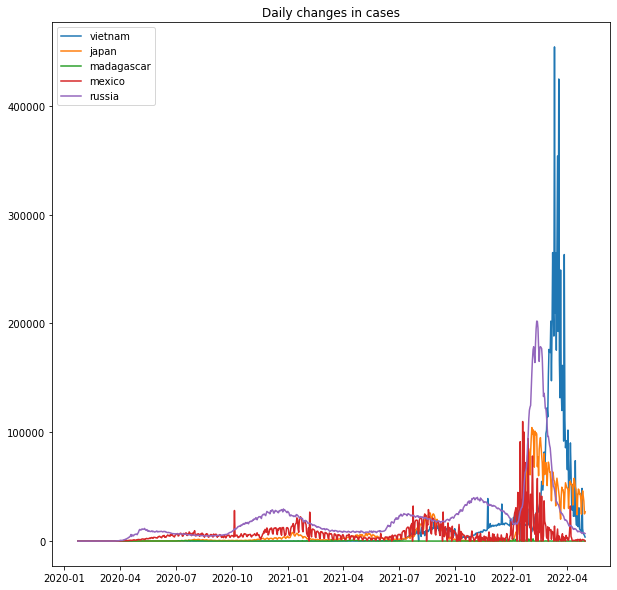

In [11]:
#Confirmed data cont.

vietnam = confirmed.loc['Vietnam']
vietnam['daily changes'] = vietnam['cases'].diff()

japan = confirmed.loc['Japan']
japan['daily changes'] = japan['cases'].diff()

madagascar = confirmed.loc['Madagascar']
madagascar['daily changes'] = madagascar['cases'].diff()

mexico = confirmed.loc['Mexico']
mexico['daily changes'] = mexico['cases'].diff()

russia = confirmed.loc['Russia']
russia['daily changes'] = russia['cases'].diff()

fig, ax = plt.subplots(figsize=(10,10))

ax.plot(vietnam.index.levels[1],vietnam['daily changes'],label='vietnam')
ax.plot(japan.index.levels[1],japan['daily changes'],label='japan')
ax.plot(madagascar.index.levels[1],madagascar['daily changes'],label='madagascar')
ax.plot(mexico.index.levels[1],mexico['daily changes'],label='mexico')
ax.plot(russia.index.levels[1],russia['daily changes'],label='russia')

ax.set_title('Daily changes in cases')
ax.legend()
plt.show()

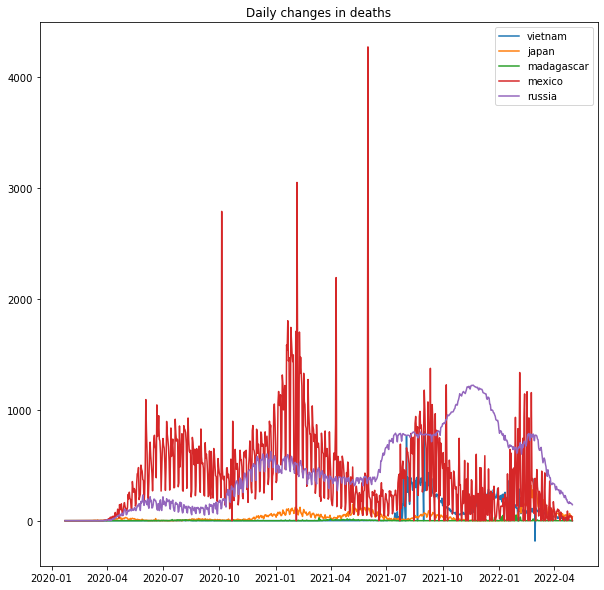

In [12]:
#Deaths data cont.

vietnam = deaths.loc['Vietnam']
vietnam['daily changes'] = vietnam['deaths'].diff()

japan = deaths.loc['Japan']
japan['daily changes'] = japan['deaths'].diff()

madagascar = deaths.loc['Madagascar']
madagascar['daily changes'] = madagascar['deaths'].diff()

mexico = deaths.loc['Mexico']
mexico['daily changes'] = mexico['deaths'].diff()

russia = deaths.loc['Russia']
russia['daily changes'] = russia['deaths'].diff()

fig, ax = plt.subplots(figsize=(10,10))

ax.plot(vietnam.index.levels[1],vietnam['daily changes'],label='vietnam')
ax.plot(japan.index.levels[1],japan['daily changes'],label='japan')
ax.plot(madagascar.index.levels[1],madagascar['daily changes'],label='madagascar')
ax.plot(mexico.index.levels[1],mexico['daily changes'],label='mexico')
ax.plot(russia.index.levels[1],russia['daily changes'],label='russia')

ax.set_title('Daily changes in deaths')
ax.legend()
plt.show()

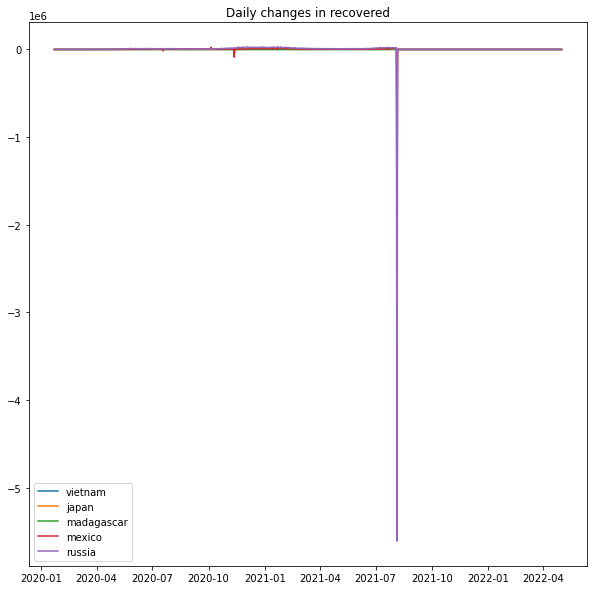

In [13]:
#Recovered data cont.

vietnam = recovered.loc['Vietnam']
vietnam['daily changes'] = vietnam['recovered'].diff()

japan = recovered.loc['Japan']
japan['daily changes'] = japan['recovered'].diff()

madagascar = recovered.loc['Madagascar']
madagascar['daily changes'] = madagascar['recovered'].diff()

mexico = recovered.loc['Mexico']
mexico['daily changes'] = mexico['recovered'].diff()

russia = recovered.loc['Russia']
russia['daily changes'] = russia['recovered'].diff()

fig, ax = plt.subplots(figsize=(10,10))

ax.plot(vietnam.index.levels[1],vietnam['daily changes'],label='vietnam')
ax.plot(japan.index.levels[1],japan['daily changes'],label='japan')
ax.plot(madagascar.index.levels[1],madagascar['daily changes'],label='madagascar')
ax.plot(mexico.index.levels[1],mexico['daily changes'],label='mexico')
ax.plot(russia.index.levels[1],russia['daily changes'],label='russia')

ax.set_title('Daily changes in recovered')
ax.legend()
plt.show()